In [1]:
from sklearn.linear_model import LinearRegression

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

data = np.array([2400, 41200,
                 2650, 50100,
                 2350, 52000,
                 4950, 66000,
                 3100, 44500,
                 2500, 37700,
                 5106, 73500,
                 3100, 37500,
                 2900, 56700,
                 1750, 35600])

data = data.reshape(10,2)

In [3]:
xy = data[:,0] * data[:,1]
x2 = data[:,0] * data[:,0]
y2 = data[:,1] * data[:,1]

print(xy.shape)

xy = xy.reshape(-1,1)
x2 = x2.reshape(-1,1)
y2 = y2.reshape(-1,1)

data_combined = np.concatenate((data,xy,x2,y2), axis = 1)
print(data_combined)

(10,)
[[       2400       41200    98880000     5760000  1697440000]
 [       2650       50100   132765000     7022500 -1784957296]
 [       2350       52000   122200000     5522500 -1590967296]
 [       4950       66000   326700000    24502500    61032704]
 [       3100       44500   137950000     9610000  1980250000]
 [       2500       37700    94250000     6250000  1421290000]
 [       5106       73500   375291000    26071236  1107282704]
 [       3100       37500   116250000     9610000  1406250000]
 [       2900       56700   164430000     8410000 -1080077296]
 [       1750       35600    62300000     3062500  1267360000]]


In [4]:
sigma_xy = np.sum(data_combined[:,2])
sigma_x = np.sum(data_combined[:,0])
sigma_y = np.sum(data_combined[:,1])
sigma_x2 = np.sum(data_combined[:,3])
sigma_y2 = np.sum(data_combined[:,4])

print(sigma_x)
print(sigma_y)
print(sigma_xy)
print(sigma_x2)
print(sigma_y2)

30806
494800
1631016000
105821236
189936224


In [5]:
def SSE(x,y,xy,x2,y2,n):
    slope = (n*xy - x*y)/(n*x2 - x*x)
    intercept = (y*x2 - x*xy)/(n*x2 - x*x)

    return slope, intercept

b1, b0 = SSE(sigma_x,sigma_y,sigma_xy,sigma_x2,sigma_y2,10)

print(b1,b0)

9.774034574448894 19.6402350549424


C:\Users\ksmin\AppData\Local\Temp\ipykernel_12732\437925098.py:2: RuntimeWarning: overflow encountered in scalar multiply
  slope = (n*xy - x*y)/(n*x2 - x*x)
C:\Users\ksmin\AppData\Local\Temp\ipykernel_12732\437925098.py:3: RuntimeWarning: overflow encountered in scalar multiply
  intercept = (y*x2 - x*xy)/(n*x2 - x*x)


In [14]:
print(b1*3500 + b0)

34228.76124562607


In [7]:
#dataset
data2 = np.array([2400, 41200,
                 2650, 50100,
                 2350, 52000,
                 4950, 66000,
                 3100, 44500,
                 2500, 37700,
                 5106, 73500,
                 3100, 37500,
                 2900, 56700,
                 1750, 35600])

data2 = data2.reshape(10,2)

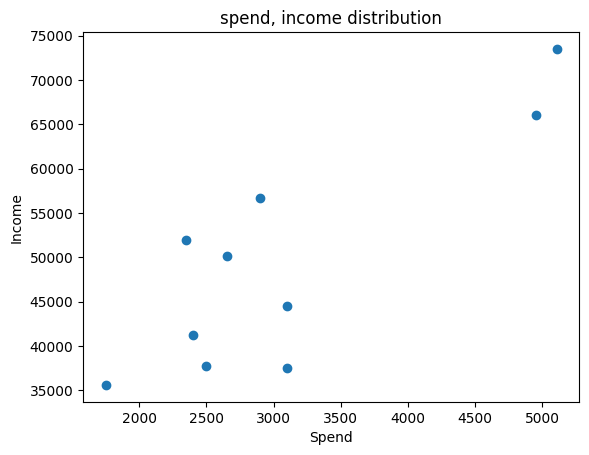

In [8]:
# X : Spend, Y : income
X = data2[:,0]
Y = data2[:,1]

plt.title("spend, income distribution")
plt.scatter(X,Y)
plt.xlabel("Spend")
plt.ylabel("Income")
plt.show()

In [9]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

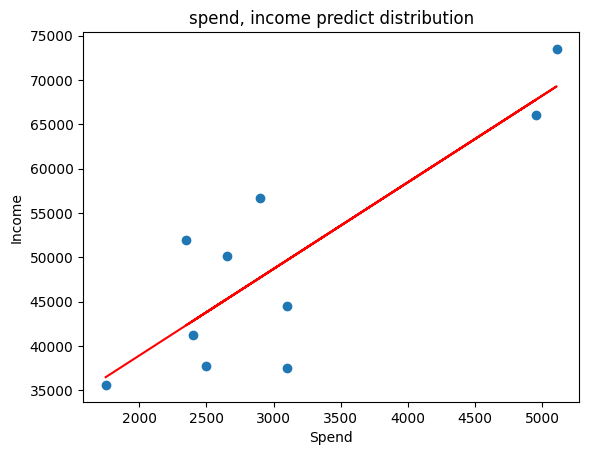

In [10]:
#model selection is LinearRegression
model = LinearRegression()
model.fit(X,Y)

plt.title("spend, income predict distribution")
plt.plot(X,model.predict(X), color='r', label = 'regression line')
plt.scatter(X,Y)
plt.xlabel("Spend")
plt.ylabel("Income")
plt.show()

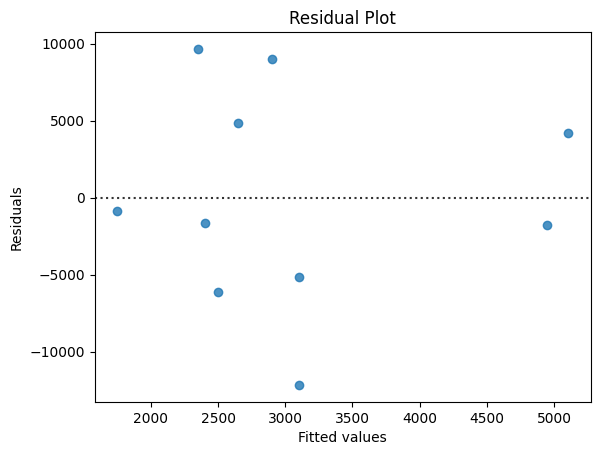

In [20]:
# Check residual, axis predicted line
sns.residplot(x=X.flatten(), y=Y.flatten() - model.predict(X).flatten(), line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [21]:
# a is slope, b is intercept
a = model.coef_
b = model.intercept_

print("Slope is : {}".format(a))
print("Intercept is : {}".format(b))
print("Spends 3500 predicted income : {}".format(a*3500 + b))
print("Spends 5300 predicted income : {}".format(a*5300 +b))

Slope is : [[9.77403457]]
Intercept is : [19370.10908995]
Spends 3500 predicted income : [[53579.23010052]]
Spends 5300 predicted income : [[71172.49233453]]
